# Worksheet 14

Name: Youxuan Ma

UID: U23330522

### Topics

- Naive Bayes
- Model Evaluation

### Naive Bayes

| Attribute A | Attribute B | Attribute C | Class |
|-------------|-------------|-------------|-------|
| Yes         | Single      | High        | No    |
| No          | Married     | Mid         | No    |
| No          | Single      | Low         | No    |
| Yes         | Married     | High        | No    |
| No          | Divorced    | Mid         | Yes   |
| No          | Married     | Low         | No    |
| Yes         | Divorced    | High        | No    |
| No          | Single      | Mid         | Yes   |
| No          | Married     | Low         | No    |
| No          | Single      | Mid         | Yes   |

a) Compute the following probabilities:

- P(Attribute A = Yes | Class = No)
- P(Attribute B = Divorced | Class = Yes)
- P(Attribute C = High | Class = No)
- P(Attribute C = Mid | Class = Yes)

- P(Attribute A = Yes | Class = No) = $3/7$
- P(Attribute B = Divorced | Class = Yes) = $1/3$
- P(Attribute C = High | Class = No) = $3/7$
- P(Attribute C = Mid | Class = Yes) = $1$

b) Classify the following unseen records:

- (Yes, Married, Mid)
- (No, Divorced, High)
- (No, Single, High)
- (No, Divorced, Low)

In [65]:
import numpy as np

# Dataset encoding: 

# Attribute A (0: No, 1: Yes), 
# Attribute B (0: Divorced, 1: Married, 2: Single),
# Attribute C (0: High, 1: Mid, 2: Low), 
# Class (0: No, 1: Yes)
data = np.array([
    [1, 2, 0, 0],
    [0, 1, 1, 0],
    [0, 2, 2, 0],
    [1, 1, 0, 0],
    [0, 0, 1, 1],
    [0, 1, 2, 0],
    [1, 0, 0, 0],
    [0, 2, 1, 1],
    [0, 1, 2, 0],
    [0, 2, 1, 1]
])

unseen_records = np.array([
    [1, 1, 1],  
    [0, 0, 0],  
    [0, 2, 0],  
    [0, 0, 2]
])

priors = [np.mean(data[:, -1] == c) for c in (0, 1)]

def calculate_likelihoods(feature_col, class_val, total_classes):
    feature_values, counts = np.unique(data[data[:, -1] == class_val][:, feature_col], return_counts=True)
    likelihoods = {val: (count + 1) / (len(data[data[:, -1] == class_val]) + total_classes)
                   for val, count in zip(feature_values, counts)}
    return likelihoods

distinct_values = [2, 3, 3]

likelihoods = {}
for class_val in (0, 1):
    likelihoods[class_val] = []
    for col in range(3):
        likelihoods[class_val].append(calculate_likelihoods(col, class_val, distinct_values[col]))

def classify(record, priors, likelihoods):
    class_probabilities = []
    for class_val in (0, 1):
        prob = priors[class_val]
        for col, val in enumerate(record):
            prob *= likelihoods[class_val][col].get(val, 1 / (len(data[data[:, -1] == class_val]) + distinct_values[col]))
        class_probabilities.append(prob)
    return np.argmax(class_probabilities)

classifications = [classify(record, priors, likelihoods) for record in unseen_records]

print("Classifications:", classifications)


Classifications: [0, 0, 0, 0]


Based on the result of my code above, the classifications for the unseen records are:

- (Yes, Married, Mid) would be class `NO`.
- (No, Divorced, High) would be class `NO`.
- (No, Single, High) would be class `NO`.
- (No, Divorced, Low) would be class `NO`.

### Model Evaluation

a) Write a function to generate the confusion matrix for a list of actual classes and a list of predicted classes

In [66]:
actual_class = ["Yes", "No", "No", "Yes", "No", "No", "Yes", "No", "No", "No"]
predicted_class = ["Yes", "No", "Yes", "No", "No", "No", "Yes", "Yes", "Yes", "No"]

def confusion_matrix(actual, predicted):
    TP = 0 
    FP = 0
    TN = 0
    FN = 0

    for act, pred in zip(actual, predicted):
        if act == "Yes" and pred == "Yes":
            TP += 1
        elif act == "No" and pred == "No":
            TN += 1
        elif act == "Yes" and pred == "No":
            FN += 1
        elif act == "No" and pred == "Yes":
            FP += 1

    confusion_matrix_result = {
        "TP": TP,
        "FP": FP,
        "TN": TN,
        "FN": FN
    }

    return confusion_matrix_result

print(confusion_matrix(actual_class, predicted_class))

{'TP': 2, 'FP': 3, 'TN': 4, 'FN': 1}


b) Assume you have the following Cost Matrix:

|            | predicted = Y | predicted = N |
|------------|---------------|---------------|
| actual = Y |       -1      |       5       |
| actual = N |        10     |       0       |

What is the cost of the above classification?

cost of the classification $= -1 \times 2 + 5 \times 1 + 10 \times 3 + 0 \times 4 = 33$.

c) Write a function that takes in the actual values, the predictions, and a cost matrix and outputs a cost. Test it on the above example.

In [67]:
def calculate_total_cost(actual, predictions, cost_matrix):
    # Step 2: Initialize the total cost to 0
    total_cost = 0

    # Step 3: Loop through all the actual and predicted values
    for act, pred in zip(actual, predictions):
        if act == "Y" and pred == "Y":
            # True Positive
            total_cost += cost_matrix['predicted = Y']['actual = Y']
        elif act == "Y" and pred == "N":
            # False Negative
            total_cost += cost_matrix['predicted = N']['actual = Y']
        elif act == "N" and pred == "Y":
            # False Positive
            total_cost += cost_matrix['predicted = Y']['actual = N']
        elif act == "N" and pred == "N":
            # True Negative
            total_cost += cost_matrix['predicted = N']['actual = N']

    # Step 4: Return the total cost
    return total_cost

# Define the cost matrix
cost_matrix = {
    'predicted = Y': {'actual = Y': -1, 'actual = N': 10},
    'predicted = N': {'actual = Y': 5, 'actual = N': 0}
}

# Actual and predicted values from the example
actual_values = ["Y", "N", "N", "Y", "N", "N", "Y", "N", "N", "N"]
predictions = ["Y", "N", "Y", "N", "N", "N", "Y", "Y", "Y", "N"]

# Step 5: Test the function
total_cost = calculate_total_cost(actual_values, predictions, cost_matrix)
print(f"The total cost of the classification is: {total_cost}")


The total cost of the classification is: 33


Based on the result of the function, the cost is 33, which is the same as my calculation above.

d) Implement functions for the following:

- accuracy
- precision
- recall
- f-measure

and apply them to the above example.

In [68]:
def accuracy(actual, predictions):
    correct = sum(act == pred for act, pred in zip(actual, predictions))
    return correct / len(actual)

def precision(actual, predictions):
    true_positives = sum(act == "Y" and pred == "Y" for act, pred in zip(actual, predictions))
    total_positive_predictions = sum(pred == "Y" for pred in predictions)
    return true_positives / total_positive_predictions

def recall(actual, predictions):
    true_positives = sum(act == "Y" and pred == "Y" for act, pred in zip(actual, predictions))
    total_actual_positives = sum(act == "Y" for act in actual)
    return true_positives / total_actual_positives

def f_measure(actual, predictions):
    prec = precision(actual, predictions)
    rec = recall(actual, predictions)
    return 2 * (prec * rec) / (prec + rec)

acc = accuracy(actual_values, predictions)
prec = precision(actual_values, predictions)
rec = recall(actual_values, predictions)
f1 = f_measure(actual_values, predictions)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F-Measure: {f1:.4f}")


Accuracy: 0.6000
Precision: 0.4000
Recall: 0.6667
F-Measure: 0.5000


## Challenge (Midterm prep part 2)

In this exercise you will update your submission to the titanic competition.

a) First let's add new numerical features / columns to the datasets that might be related to the survival of individuals.

- `has_cabin` should have a value of 0 if the `cabin` feature is `nan` and 1 otherwise
- `family_members` should have the total number of family members (by combining `SibSp` and `Parch`)
- `title_type`: from the title extracted from the name, we will categorize it into 2 types: `common` for titles that many passengers have, `rare` for titles that few passengers have. Map `common` to 1 and `rare` to 0. Describe what threshold you used to define `common` and `rare` titles and how you found it.
- `fare_type`: using Kmeans clustering on the fare column, find an appropriate number of clusters / groups of similar fares. Using the clusters you created, `fare_price` should be an ordinal variable that represents the expensiveness of the fare. For example if you split fare into 3 clusters ( 0 - 15, 15 - 40, and 40+ ) then the `fare_price` value should be `0` for `fare` values 0 - 15, `1` for 15 - 40, and `2` for 40+.
- Create an addition two numerical features of your invention that you think could be relevant to the survival of individuals.

Note: The features must be numerical because the sklearn `DecisionTreeClassifier` can only take on numerical features.

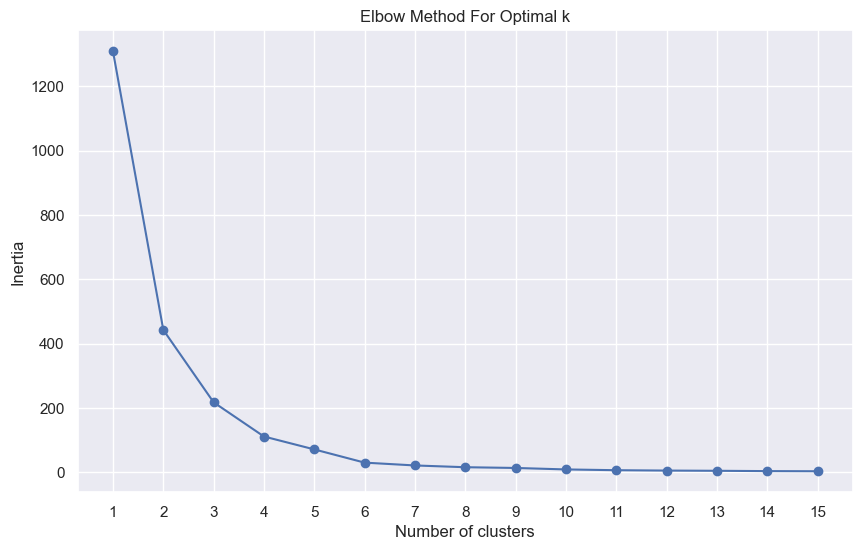

In [69]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Function to add the 'has_cabin' feature
def add_has_cabin_feature(df):
    df['has_cabin'] = df['Cabin'].apply(lambda x: 0 if pd.isnull(x) else 1)

# Function to add the 'family_members' feature
def add_family_members_feature(df):
    df['family_members'] = df['SibSp'] + df['Parch']

# Function to add the 'title_type' feature based on the commonality of titles
def add_title_type_feature(df):
    df['title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
    title_counts = df['title'].value_counts()
    mean = title_counts.mean()
    std = title_counts.std()
    threshold = mean
    common_titles = title_counts[title_counts > threshold].index.tolist()
    df['title_type'] = df['title'].apply(lambda x: 1 if x in common_titles else 0)

def add_additional_features(df):
    # 'is_alone': 1 if traveling alone (family_members == 0), 0 otherwise
    df['is_alone'] = (df['family_members'] == 0).astype(int)

    # 'age_group': categorizes age into groups (child: 0-12, young: 13-19, adult: 20-65, senior: 66+)
    bins = [0, 12, 19, 65, max(df['Age'].max()+1, 66)]
    labels = [0, 1, 2, 3]  # 0: child, 1: young, 2: adult, 3: senior
    df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)
    

train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

# Combine datasets
train_df['is_train'] = 1
test_df['is_train'] = 0

combined_df = pd.concat([train_df, test_df])

# Handling Missing Values
# Impute missing Age values based on median of Pclass and Sex groups
combined_df['Age'] = combined_df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

# Impute Embarked with the mode
combined_df['Embarked'] = combined_df['Embarked'].fillna(combined_df['Embarked'].mode()[0])

# Impute missing Fare values with the median Fare of Pclass
combined_df['Fare'] = combined_df.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.median()))

# Add new features/columns
add_has_cabin_feature(combined_df)
add_family_members_feature(combined_df)
add_title_type_feature(combined_df)
add_additional_features(combined_df)

# Data Preparation for `fare_type` Clustering
fare_values = combined_df['Fare'].values.reshape(-1, 1)
scaler = StandardScaler()
fare_scaled = scaler.fit_transform(fare_values)

# Elbow Method to determine the optimal number of clusters
inertia = []
K_range = range(1, 16)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(fare_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.grid(True)
plt.show()


I chose the threshold for making the `title_type` feature as the mean of the title frequencies.

In other words, titles are defined as "rare" if their frequency is less than the mean.

In [70]:
# Applying KMeans Clustering to the 'fare' column
kmeans = KMeans(n_clusters=6, random_state=42)
combined_df['fare_type'] = kmeans.fit_predict(fare_scaled)

# Mapping cluster assignments to an ordinal scale representing fare expensiveness
cluster_means = combined_df.groupby('fare_type')['Fare'].mean().sort_values()

# Creating a dictionary to map clusters to ordinal values based on sorted mean fares
cluster_to_ordinal = {cluster: ordinal for ordinal, cluster in enumerate(cluster_means.index)}

# Apply the mapping to create 'fare_price'
combined_df['fare_price'] = combined_df['fare_type'].map(cluster_to_ordinal)

# Convert Sex to binary
combined_df['Sex'] = combined_df['Sex'].map({'male': 0, 'female': 1})

# Dropping Unnecessary Features
combined_df.drop(['PassengerId', 'Name', 'Ticket', 'Embarked', 'Pclass', 'Cabin', 'fare_type', 'title'], axis=1, inplace=True)

# Split back into train and test datasets
train_preprocessed = combined_df[combined_df['is_train'] == 1].drop(['is_train'], axis=1)
test_preprocessed = combined_df[combined_df['is_train'] == 0].drop(['is_train', 'Survived'], axis=1)

combined_df.to_csv('datasets_combined.csv', index=False)
train_preprocessed.to_csv('train_preprocessed.csv', index=False)
test_preprocessed.to_csv('test_preprocessed.csv', index=False)

print(train_preprocessed.info())
print(test_preprocessed.info())


<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Survived        891 non-null    float64 
 1   Sex             891 non-null    int64   
 2   Age             891 non-null    float64 
 3   SibSp           891 non-null    int64   
 4   Parch           891 non-null    int64   
 5   Fare            891 non-null    float64 
 6   has_cabin       891 non-null    int64   
 7   family_members  891 non-null    int64   
 8   title_type      891 non-null    int64   
 9   is_alone        891 non-null    int64   
 10  age_group       891 non-null    category
 11  fare_price      891 non-null    int64   
dtypes: category(1), float64(3), int64(8)
memory usage: 84.6 KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  ----

b) Using a method covered in class, tune the parameters of a decision tree model on the titanic dataset (containing all numerical features including the ones you added above). Evaluate this model locally and report it's performance.

Note: make sure you are not tuning your parameters on the same dataset you are using to evaluate the model. Also explain how you know you are not overfitting to the training set.

In [71]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score

X = train_preprocessed.drop(['Survived'], axis=1)
y = train_preprocessed['Survived']

# Splitting the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Parameters for GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Validation
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred)
val_f1 = f1_score(y_val, y_pred)

(best_params, best_score, val_accuracy, val_f1)

({'criterion': 'entropy',
  'max_depth': 5,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 0.8314586821629074,
 0.8156424581005587,
 0.7659574468085106)

I know that I'm not overfitting to the training set by:
- Using a separate validation set for performance evaluation.
- Employing cross-validation during hyperparameter tuning with GridSearchCV.
- Evaluating the model's performance on unseen data to check for generalization.

c) Try reducing the dimension of the dataset and create a Naive Bayes model. Evaluate this model.

In [72]:
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import Pipeline

pca = PCA(n_components=0.95)

naive_bayes = GaussianNB()

nb_pipeline = Pipeline(steps=[('pca', pca), ('naive_bayes', naive_bayes)])

nb_pipeline.fit(X_train, y_train)

y_pred_nb = nb_pipeline.predict(X_val)

accuracy_nb = accuracy_score(y_val, y_pred_nb)
f1_score_nb = f1_score(y_val, y_pred_nb)

(accuracy_nb, f1_score_nb)


(0.659217877094972, 0.34408602150537637)

d) Create an ensemble classifier using a combination of KNN, Decision Trees, and Naive Bayes models. Evaluate this classifier.

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

param_grid_knn = {
    'knn__n_neighbors': range(1, 21),
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('knn', KNeighborsClassifier())
])

grid_search_knn = GridSearchCV(knn_pipeline, param_grid_knn, cv=5, scoring='accuracy')

grid_search_knn.fit(X_train, y_train)

best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_val)
accuracy_knn = accuracy_score(y_val, y_pred_knn)
f1_score_knn = f1_score(y_val, y_pred_knn)
print(best_params_knn, best_score_knn, accuracy_knn, f1_score_knn)


{'knn__metric': 'manhattan', 'knn__n_neighbors': 20, 'knn__weights': 'uniform'} 0.8047572146163695 0.7821229050279329 0.7346938775510204


In [74]:
knn = best_knn
dtree = best_dt
nbayes = nb_pipeline

ensemble = VotingClassifier(estimators=[
    ('knn', knn), ('dtree', dtree), ('nbayes', nbayes)],
    voting='soft')

ensemble_pipeline = Pipeline(steps=[('ensemble', ensemble)])

ensemble_pipeline.fit(X_train, y_train)

y_pred_ensemble = ensemble_pipeline.predict(X_val)

accuracy_ensemble = accuracy_score(y_val, y_pred_ensemble)
f1_score_ensemble = f1_score(y_val, y_pred_ensemble)

(accuracy_ensemble, f1_score_ensemble)

(0.8212290502793296, 0.7681159420289855)

e) Update your kaggle submission using the best model you created (best model means the one that performed the best on your local evaluation)

In [75]:
# Make predictions on the test dataset
predictions = ensemble_pipeline.predict(test_preprocessed)

# Create and save the submission file
submission_df = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': predictions.astype(int)})

submission_file_path = './updated_titanic_prediction.csv'
submission_df.to_csv(submission_file_path, index=False)

My Kaggle username is: MarkMa316

## Some useful code for the midterm

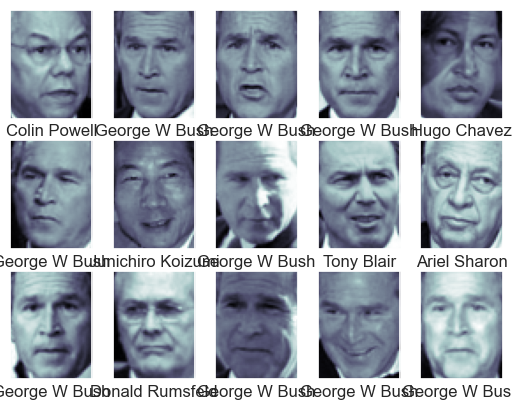

In [76]:
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import fetch_lfw_people
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

sns.set()

# Get face data
faces = fetch_lfw_people(min_faces_per_person=60)

# plot face data
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])
plt.show()

# # split train test set
# Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

# pca = PCA(n_components=150, whiten=True)
# svc = SVC(kernel='rbf', class_weight='balanced')
# svcpca = make_pipeline(pca, svc)

# # Tune model to find best values of C and gamma using cross validation
# param_grid = {'svc__C': [1, 5, 10, 50],
#               'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
# kfold = 4
# grid = GridSearchCV(svcpca, param_grid, cv=kfold)
# grid.fit(Xtrain, ytrain)

# print(grid.best_params_)

# # use the best params explicitly here
# pca = PCA(n_components=150, whiten=True)
# svc = SVC(kernel='rbf', class_weight='balanced', C=10, gamma=0.005)
# svcpca = make_pipeline(pca, svc)

# model = BaggingClassifier(svcpca, n_estimators=100).fit(Xtrain, ytrain)
# yfit = model.predict(Xtest)

# fig, ax = plt.subplots(6, 6)
# for i, axi in enumerate(ax.flat):
#     axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
#     axi.set(xticks=[], yticks=[])
#     axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
#                    color='black' if yfit[i] == ytest[i] else 'red')
# fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)
# plt.show()

# mat = confusion_matrix(ytest, yfit)
# sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
#             xticklabels=faces.target_names,
#             yticklabels=faces.target_names)
# plt.xlabel('true label')
# plt.ylabel('predicted label')
# plt.show()

# print("Accuracy = ", accuracy_score(ytest, yfit))